In [1]:
!pip install Pillow==8.4

In [ ]:
import io
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

In [ ]:
CONFIG = {
    'SUBSCRIPTION_KEY': 'dde7e1cb57914e1c87280a4df8accf20',
    'LOCATION': 'trial',
    'ACCOUNT_ID': 'b4081617-fb5a-4046-bf78-095f64cf2951'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

In [ ]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiIzYTJkNjYyODkzOWM0ZjdiYjkzMWY4NjU4YjIwYzE4MCIsIkFjY291bnRJZCI6ImI0MDgxNjE3LWZiNWEtNDA0Ni1iZjc4LTA5NWY2NGNmMjk1MSIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IkRCMzc4RjU2ODM2RDQ4Mjc4RDE5MTIyNzk2REIwNEM2IiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY3ODcwOTgwNCwiZXhwIjoxNjc4NzEzNzA0LCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.Dk4ux85ZxkTNKaZCgOoaWyrBTMK_lJqW_4dsB2Tf_C3h9j820TCgBsSDzD7QBwqwr0aNAm52tfHmOT_bQksEN8ZlXHd8eBF37sYGy_8hrf9ZL4KWnkUh6vIj7bUPXYJM_cMDtHtpgHFfNHYilXe3rHUELBMMU-Coi6-HDAOO1aoZvMxVRFSaNQ96P_-aHFbehTZ_m6qzzGwhcmvO5W_Ef6usOyLafnOUHYdSkv3U3ya4DVG0UAcWwCuAxpFhM_WXJiJRsQfVFPNKZNL-cerbNxpIHtpGir1319LL7wF6ImMQryHuQH2ZjKRzpoqCCV8TcP3RxST0YTgcSj3U1Rujag


In [ ]:
video_id = '2cfda10f65'

In [ ]:
video_analysis.get_video_info(video_id)

Getting video info for: 2cfda10f65


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': 'b4081617-fb5a-4046-bf78-095f64cf2951',
 'id': '2cfda10f65',
 'name': 'videoAnalyze',
 'userName': 'ODL_User 227691',
 'created': '2023-03-13T10:51:33.5787722+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 20,
 'duration': '0:00:20.7',
 'summarizedInsights': {'name': 'videoAnalyze',
  'id': '2cfda10f65',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:20.7', 'seconds': 20.7},
  'thumbnailVideoId': '2cfda10f65',
  'thumbnailId': '443f3026-4c79-4b35-9239-13756850e4a9',
  'faces': [{'videoId': '2cfda10f65',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': '442c9367-8dee-43c2-a19d-a3fac4d93341',
    'seenDuration': 20.7,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:20.7',
      'startSeconds': 0,
      'endSecond

In [ ]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: 2cfda10f65


In [ ]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 6 faces in this video.


In [ ]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': '13af56ab-e1ca-4175-92a4-30a4fc12d6ab',
  'fileName': 'FaceInstanceThumbnail_13af56ab-e1ca-4175-92a4-30a4fc12d6ab.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0333333',
    'start': '0:00:00',
    'end': '0:00:00.0333333'}]},
 {'id': '442c9367-8dee-43c2-a19d-a3fac4d93341',
  'fileName': 'FaceInstanceThumbnail_442c9367-8dee-43c2-a19d-a3fac4d93341.jpg',
  'instances': [{'adjustedStart': '0:00:01.8666666',
    'adjustedEnd': '0:00:01.8999999',
    'start': '0:00:01.8666666',
    'end': '0:00:01.8999999'}]},
 {'id': '516f43fa-2a53-469c-9b18-e90e4622c823',
  'fileName': 'FaceInstanceThumbnail_516f43fa-2a53-469c-9b18-e90e4622c823.jpg',
  'instances': [{'adjustedStart': '0:00:05.1333333',
    'adjustedEnd': '0:00:05.1666666',
    'start': '0:00:05.1333333',
    'end': '0:00:05.1666666'}]},
 {'id': 'b9a1412d-06f9-43b3-8162-3498260fb1c3',
  'fileName': 'FaceInstanceThumbnail_b9a1412d-06f9-43b3-8162-3498260fb1c3.jpg',
  'instances': [{'adjustedStart': '0

In [ ]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 2cfda10f65, thumbnail: 13af56ab-e1ca-4175-92a4-30a4fc12d6ab
Getting thumbnail from video: 2cfda10f65, thumbnail: 442c9367-8dee-43c2-a19d-a3fac4d93341
Getting thumbnail from video: 2cfda10f65, thumbnail: 516f43fa-2a53-469c-9b18-e90e4622c823
Getting thumbnail from video: 2cfda10f65, thumbnail: b9a1412d-06f9-43b3-8162-3498260fb1c3
Getting thumbnail from video: 2cfda10f65, thumbnail: 08bbd9ea-238b-45d0-8ef7-9a8f2a9e7e2c
Getting thumbnail from video: 2cfda10f65, thumbnail: 87ad2c5a-d5ad-495e-8fea-4c25a5a513bd


Extract face thumbnails from the video

{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}


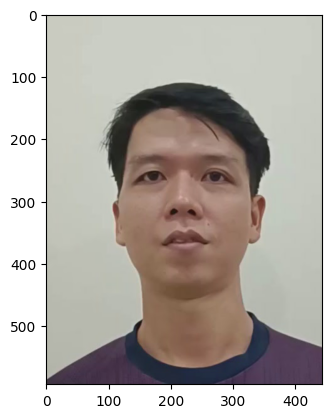

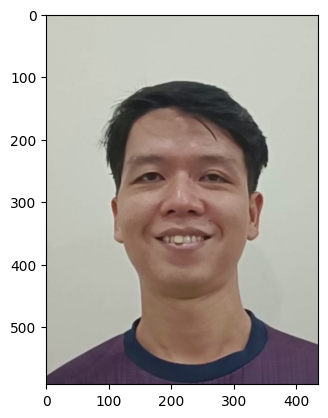

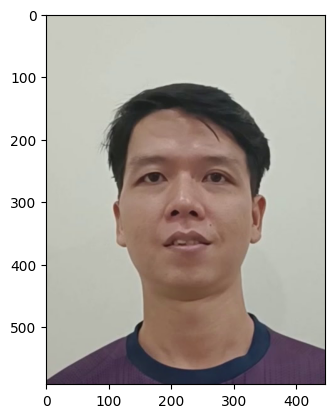

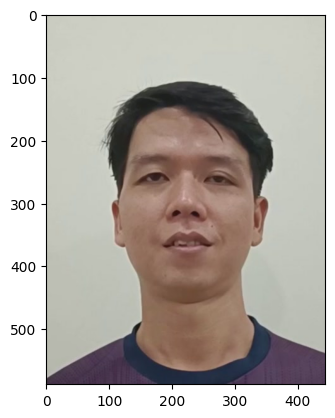

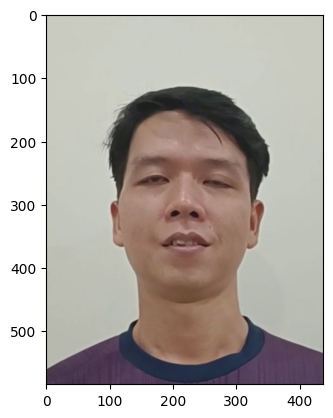

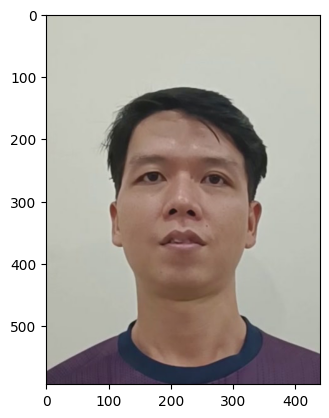

In [ ]:
for img in images:
    print(img.info)
    plt.figure()
    plt.imshow(img)

In [ ]:
i = 1
for img in images:
    print(type(img))
    img.save('video-analyzer-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
!ls video-analyzer-face*.jpg

video-analyzer-face1.jpg  video-analyzer-face3.jpg  video-analyzer-face5.jpg
video-analyzer-face2.jpg  video-analyzer-face4.jpg  video-analyzer-face6.jpg


In [ ]:
thumbnail_id='13af56ab-e1ca-4175-92a4-30a4fc12d6ab'

In [ ]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
print(img_code)

Getting thumbnail from video: 2cfda10f65, thumbnail: 13af56ab-e1ca-4175-92a4-30a4fc12d6ab
b'\xff\xd8\xff\xfe\x00\x10Lavc59.18.100\x00\xff\xdb\x00C\x00\x08\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x07\x07\x07\x08\x08\x08\x07\x07\x07\x06\x06\x07\x07\x08\x08\x08\x08\t\t\t\x08\x08\x08\x08\t\t\n\n\n\x0c\x0c\x0b\x0b\x0e\x0e\x0e\x11\x11\x14\xff\xc4\x00\xab\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x02\x05\x06\x07\x08\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x10\x00\x02\x01\x03\x02\x03\x05\x05\x05\x05\x05\x06\x04\x07\x01\x00\x00\x01\x02\x04\x11\x03\x05!\x121\x06\x13"AQq2\x91\x81a\x07\xa1\xb1\x14B\xc1R\xd13#r\xe1b\xf1\xf0\x15Sc\x924C\x82\x08\xb2\xa2\x16$\x93\xd2\x17D\x83\xc2s\x11\x01\x01\x00\x02\x01\x03\x02\x04\x04\x06\x02\x02\x03\x01\x00\x00\x00\x01\x02\x11\x03\x041!A\x12qQ\x812a\xf0\x05\x13\xa1\x91\xb1\xc1"3r\x15S\xd1\xe1BR#\xff\xc0\x00\x11\x08\x0

Getting thumbnail from video: 2cfda10f65, thumbnail: 13af56ab-e1ca-4175-92a4-30a4fc12d6ab


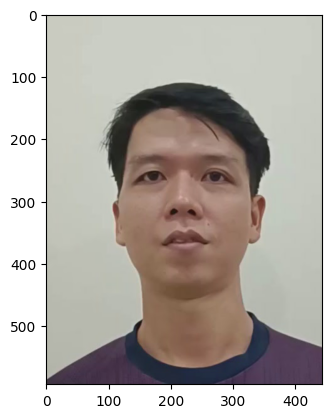

In [ ]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

Create a Person model by combining various face frames

In [ ]:
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-trongphan'

In [ ]:
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    human_person = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg human images in working directory.
    human_face_images = [file for file in glob.glob('*.jpg') if file.startswith("video-analyzer-face")]
    # Add images to a Person object
    for image_p in human_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, human_person.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [ ]:
TRONG_FACE_KEY = "2adeb8913d2c4398aac384dcad8ed8cc"
TRONG_FACE_ENDPOINT = "https://trongfaceapi.cognitiveservices.azure.com/"

In [ ]:
face_client = FaceClient(TRONG_FACE_ENDPOINT, CognitiveServicesCredentials(TRONG_FACE_KEY))

In [ ]:
face_client.api_version

'1.0'

In [ ]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: 5c95ceaf-f8f9-4569-9081-ed9743573643
Training status: succeeded.


In [ ]:
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [ ]:
test_images = [file for file in glob.glob('video-analyzer-face*.jpg')]

In [ ]:
test_images

['video-analyzer-face5.jpg',
 'video-analyzer-face6.jpg',
 'video-analyzer-face3.jpg',
 'video-analyzer-face1.jpg',
 'video-analyzer-face2.jpg',
 'video-analyzer-face4.jpg']

In [ ]:
ids = detect_faces(face_client, test_images)

Detecting faces in query images list...
Opening image:  video-analyzer-face5.jpg
Face ID 6d776efc-4017-4d00-9518-5e39b025ca4d found in image video-analyzer-face5.jpg
Opening image:  video-analyzer-face6.jpg
Face ID 1fa65bef-2627-45ee-8638-2604458e1f74 found in image video-analyzer-face6.jpg
Opening image:  video-analyzer-face3.jpg
Face ID 18983c49-0e84-4402-9235-eeda4c8393a7 found in image video-analyzer-face3.jpg
Opening image:  video-analyzer-face1.jpg
Face ID bf61a9b9-5bbd-460b-80ab-228fd265eb66 found in image video-analyzer-face1.jpg
Opening image:  video-analyzer-face2.jpg
Face ID 69adc5ed-1f98-4ebe-929e-b776f74d151d found in image video-analyzer-face2.jpg
Opening image:  video-analyzer-face4.jpg
Face ID 2c65bdec-5637-4d72-92f8-7e4ad639076f found in image video-analyzer-face4.jpg


In [ ]:
ids

{'video-analyzer-face5.jpg': '6d776efc-4017-4d00-9518-5e39b025ca4d',
 'video-analyzer-face6.jpg': '1fa65bef-2627-45ee-8638-2604458e1f74',
 'video-analyzer-face3.jpg': '18983c49-0e84-4402-9235-eeda4c8393a7',
 'video-analyzer-face1.jpg': 'bf61a9b9-5bbd-460b-80ab-228fd265eb66',
 'video-analyzer-face2.jpg': '69adc5ed-1f98-4ebe-929e-b776f74d151d',
 'video-analyzer-face4.jpg': '2c65bdec-5637-4d72-92f8-7e4ad639076f'}

Verify

In [ ]:
verify_result = face_client.face.verify_face_to_face(ids['video-analyzer-face1.jpg'], ids['video-analyzer-face5.jpg'])

In [ ]:
if verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.93052.


In [ ]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

In [ ]:
dl_source_url = 'https://raw.githubusercontent.com/trongvanphan/Automated-Passenger-Boarding-Kiosk/main/Project_Starter_Material_Preparation/ca-dl-trongphan.png'

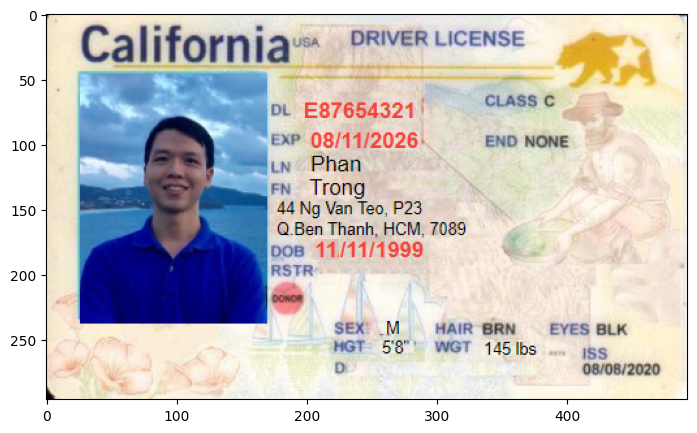

In [ ]:
show_image_in_cell(dl_source_url)

In [ ]:
dl_faces = face_client.face.detect_with_url(dl_source_url) 

In [ ]:
for face in dl_faces:
    print('Face ID', face.face_id, 'found in image', dl_source_url)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    ids['ca-dl-sample.png'] = face.face_id

Face ID fa4e9f60-b1e5-4673-bfaf-7592c6b21507 found in image https://raw.githubusercontent.com/trongvanphan/Automated-Passenger-Boarding-Kiosk/main/Project_Starter_Material_Preparation/ca-dl-trongphan.png


In [ ]:
ids

{'video-analyzer-face5.jpg': '6d776efc-4017-4d00-9518-5e39b025ca4d',
 'video-analyzer-face6.jpg': '1fa65bef-2627-45ee-8638-2604458e1f74',
 'video-analyzer-face3.jpg': '18983c49-0e84-4402-9235-eeda4c8393a7',
 'video-analyzer-face1.jpg': 'bf61a9b9-5bbd-460b-80ab-228fd265eb66',
 'video-analyzer-face2.jpg': '69adc5ed-1f98-4ebe-929e-b776f74d151d',
 'video-analyzer-face4.jpg': '2c65bdec-5637-4d72-92f8-7e4ad639076f',
 'ca-dl-sample.png': 'fa4e9f60-b1e5-4673-bfaf-7592c6b21507'}

In [ ]:
dl_verify_result = face_client.face.verify_face_to_face(ids['video-analyzer-face1.jpg'], ids['ca-dl-sample.png'])

In [ ]:
if dl_verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(dl_verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(dl_verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.78235.


In [ ]:
ids['ca-dl-sample.png']

'fa4e9f60-b1e5-4673-bfaf-7592c6b21507'

In [ ]:
ids.values()

dict_values(['6d776efc-4017-4d00-9518-5e39b025ca4d', '1fa65bef-2627-45ee-8638-2604458e1f74', '18983c49-0e84-4402-9235-eeda4c8393a7', 'bf61a9b9-5bbd-460b-80ab-228fd265eb66', '69adc5ed-1f98-4ebe-929e-b776f74d151d', '2c65bdec-5637-4d72-92f8-7e4ad639076f', 'fa4e9f60-b1e5-4673-bfaf-7592c6b21507'])

In [ ]:
dl_faces[0].face_rectangle.as_dict()

{'width': 47, 'height': 47, 'left': 76, 'top': 98}

In [ ]:
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [ ]:
def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

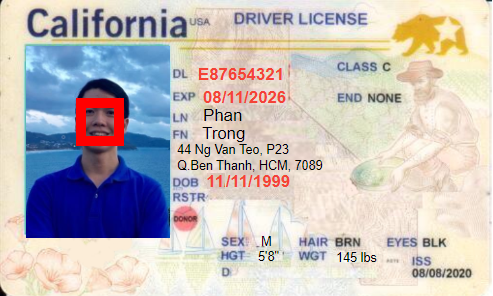

In [ ]:
drawFaceRectangles(dl_source_url, dl_faces)

Verify the face id with the digital id

In [ ]:
ids

{'video-analyzer-face5.jpg': '6d776efc-4017-4d00-9518-5e39b025ca4d',
 'video-analyzer-face6.jpg': '1fa65bef-2627-45ee-8638-2604458e1f74',
 'video-analyzer-face3.jpg': '18983c49-0e84-4402-9235-eeda4c8393a7',
 'video-analyzer-face1.jpg': 'bf61a9b9-5bbd-460b-80ab-228fd265eb66',
 'video-analyzer-face2.jpg': '69adc5ed-1f98-4ebe-929e-b776f74d151d',
 'video-analyzer-face4.jpg': '2c65bdec-5637-4d72-92f8-7e4ad639076f',
 'ca-dl-sample.png': 'fa4e9f60-b1e5-4673-bfaf-7592c6b21507'}

In [ ]:
get_the_face_id_from_the_driving_license = 'fa4e9f60-b1e5-4673-bfaf-7592c6b21507'

In [ ]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_driving_license], PERSON_GROUP_ID)

In [ ]:
for result in person_gp_results:
    for candidate in result.candidates:
        print("The Identity match confidence is {}".format(candidate.confidence))

The Identity match confidence is 0.81126


Extract Sentiment and Emotion from Video

In [ ]:
info['summarizedInsights']['sentiments']

NameError: name 'info' is not defined